In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mpl

%matplotlib inline

In [2]:
df = pd.read_csv("../Datasets/Airbnb_Texas_Rentals.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'average_rate_per_night', 'bedrooms_count', 'city',
       'date_of_listing', 'description', 'latitude', 'longitude', 'title',
       'url'],
      dtype='object')

In [4]:
# I found this illegal data during conversion, so I had to remove it.
illegal_entries = ['Studio']
df['average_rate_per_night'] = df.average_rate_per_night.map(lambda x : float(str(x).lstrip('$')))
df['bedrooms_count'] = df.bedrooms_count.map(lambda x : 0 if illegal_entries.__contains__(x) else float(x))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18259 non-null  int64  
 1   average_rate_per_night  18231 non-null  float64
 2   bedrooms_count          18256 non-null  float64
 3   city                    18259 non-null  object 
 4   date_of_listing         18259 non-null  object 
 5   description             18257 non-null  object 
 6   latitude                18225 non-null  float64
 7   longitude               18225 non-null  float64
 8   title                   18256 non-null  object 
 9   url                     18259 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.4+ MB


### Correlation between dataframe columns
I was doing a quick analysis through column patterns on current dataset. Hence, I chosen to do a correlation analysis between columns **`average_rate_per_night`** and **`bedrooms_count`** with data types `object`, aka `string`.

However, to the data being compared between each other I had to do a quick type conversion using native Python logic. Therefore, once that step was completed and successfully converted from `string` to valid `float64` type, I began with correlation between these values.

Checking graph comparisions, we can expect a relative price increasement through bedrooms counting and it can be described by data correlation on current dataframe.

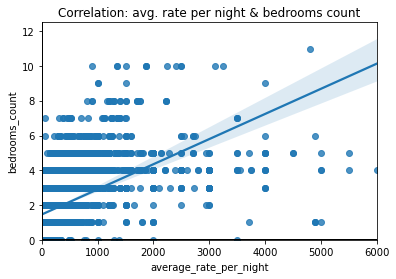

Column: average_rate_per_night
- mean: 211.5397400032911
- std: 415.56933400287886


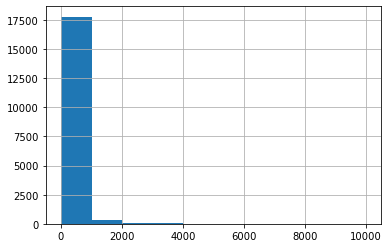

Column: bedrooms_count
- mean: 1.7681310254163014
- std: 1.240190181442118


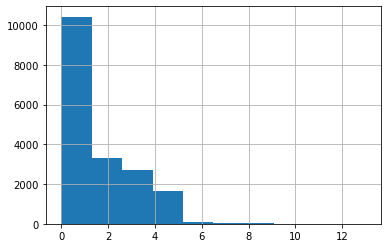

In [6]:
df_avg_rpn_bcount = df[['average_rate_per_night', 'bedrooms_count']]
df_corr_ab = sns.regplot('average_rate_per_night', 'bedrooms_count', df_avg_rpn_bcount)
df_corr_ab.set(xlim=(0, 6000), ylim=(0, 12.5))
df_corr_ab.axhline(0, color='k', linestyle='-', linewidth=2)
df_corr_ab.axvline(0, color='k', linestyle='-', linewidth=2)
df_corr_ab.axes.set_title('Correlation: avg. rate per night & bedrooms count')
mpl.show()

for entry in df_avg_rpn_bcount.columns:
    print("Column: {}".format(entry))
    data = df_avg_rpn_bcount.loc[:,entry]
    data.hist()
    print("- mean: {}".format(data.mean()))
    print("- std: {}".format(data.std()))
    mpl.show()